# Purpose: 
Explore the cleaned data to find patterns, insights, and generate visualizations.

## 1. Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 2. Configuration

In [3]:
PROCESSED_DATA_PATH = '../data/processed_data/cleaned_data.parquet'
FIGURES_PATH = '../reports/figures/'

In [ ]:
# Set plotting style for consistency
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 3. Load Cleaned Data

In [5]:
print("Loading cleaned data...")
df = pd.read_parquet(PROCESSED_DATA_PATH)
print("Data loaded successfully.")

Loading cleaned data...
Data loaded successfully.


In [ ]:
# Filter for national-level data for clearer high-level trends
df_nat = df[df['Jurisdiction'] == 'NAT_TOTAL'].copy()
df_nat.set_index('Date', inplace=True)

## 4. Time-Series Analysis

In [7]:
print("\nGenerating time-series plots...")


Generating time-series plots...


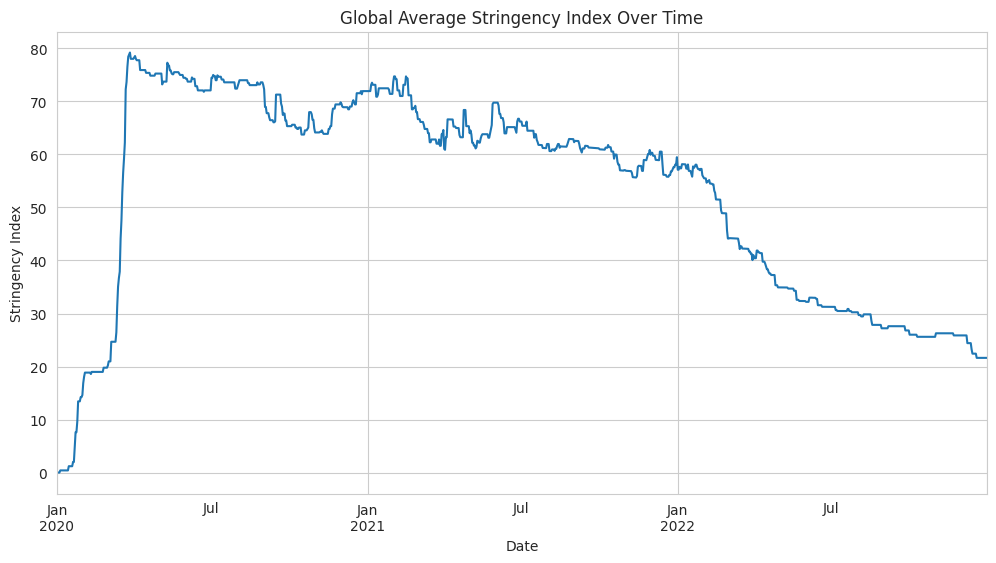

In [8]:
# Plot global average stringency over time
global_stringency = df_nat.groupby('Date')['StringencyIndex_Average'].mean()
global_stringency.plot(title='Global Average Stringency Index Over Time')
plt.ylabel('Stringency Index')
plt.savefig(f"{FIGURES_PATH}global_stringency_over_time.png")
plt.show()

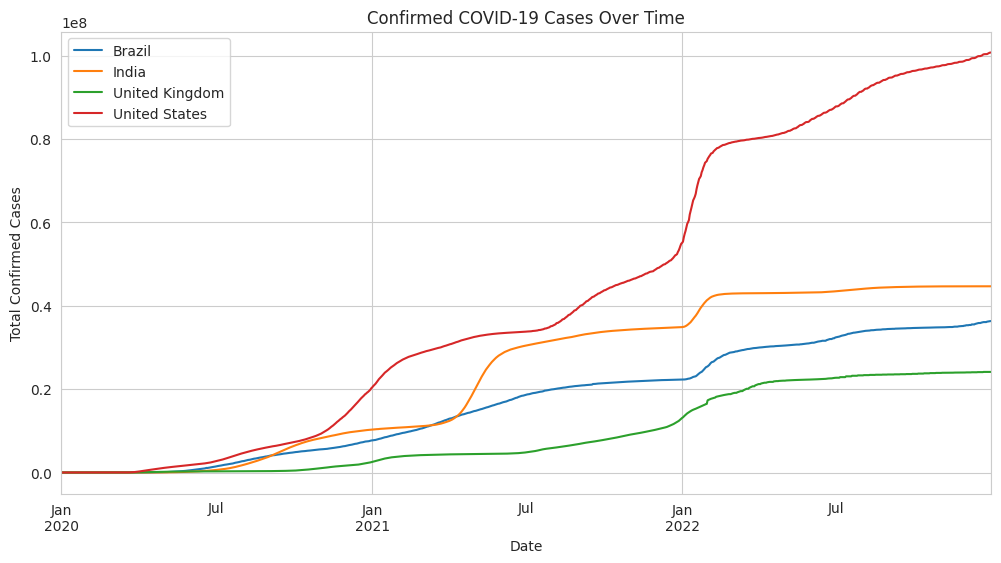

In [9]:
# Compare confirmed cases in a few key countries
countries_to_compare = ['United States', 'India', 'Brazil', 'United Kingdom']
df_nat[df_nat['CountryName'].isin(countries_to_compare)].groupby('CountryName')['ConfirmedCases'].plot(legend=True)
plt.title('Confirmed COVID-19 Cases Over Time')
plt.ylabel('Total Confirmed Cases')
plt.savefig(f"{FIGURES_PATH}confirmed_cases_comparison.png")
plt.show()

## 5. Correlation Analysis

In [10]:
print("\nGenerating correlation heatmap...")


Generating correlation heatmap...


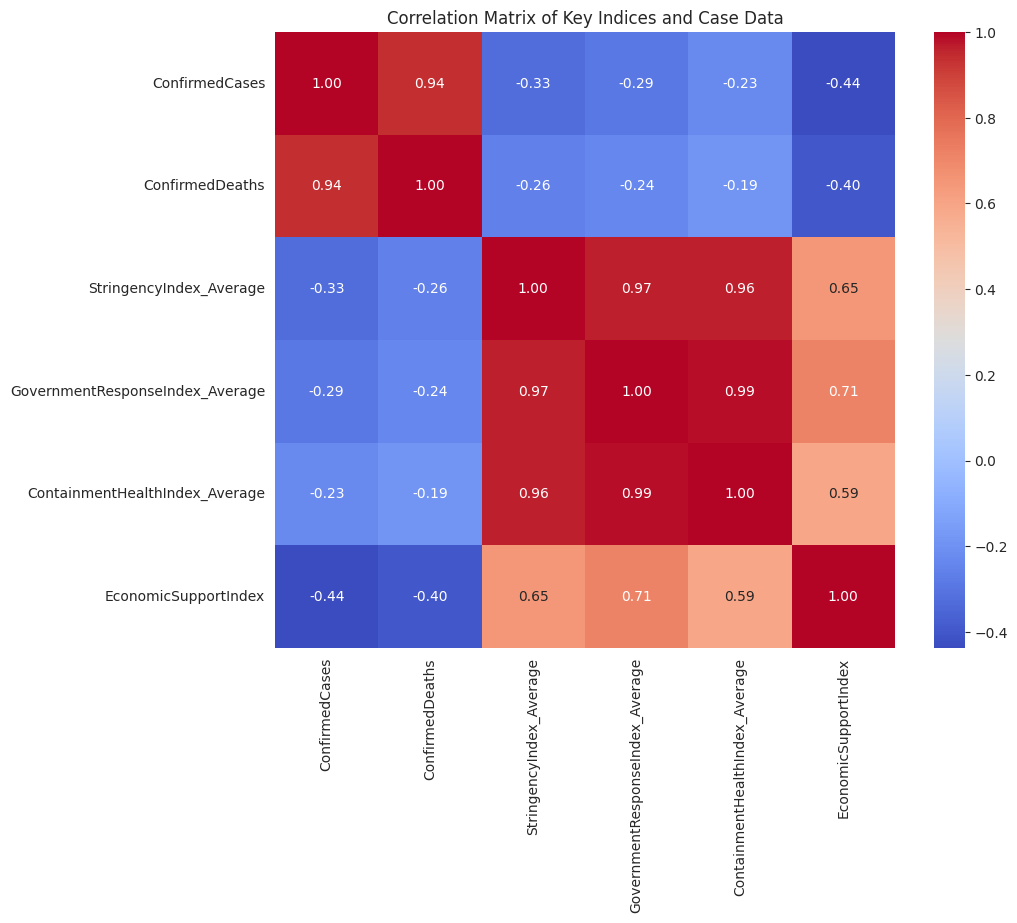

In [11]:
# Select key numeric columns for the heatmap
corr_cols = [
    'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex_Average',
    'GovernmentResponseIndex_Average', 'ContainmentHealthIndex_Average',
    'EconomicSupportIndex'
]
corr_matrix = df_nat[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Indices and Case Data')
plt.savefig(f"{FIGURES_PATH}correlation_heatmap.png")
plt.show()

## 6. Geospatial Analysis (Choropleth Map)

In [12]:
print("\nGenerating geospatial map of stringency...")


Generating geospatial map of stringency...


In [13]:
# Create a snapshot of the most recent stringency index for each country
latest_date = df_nat.index.max()
df_latest = df_nat[df_nat.index == latest_date]

fig = px.choropleth(df_latest,
                    locations="CountryCode",
                    color="StringencyIndex_Average",
                    hover_name="CountryName",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title=f"COVID-19 Stringency Index on {latest_date.date()}")
fig.show()

In [15]:
# To save interactive plots, you might need to export them to HTML
fig.write_html(f"{FIGURES_PATH}stringency_map.html")
print("\nEDA complete. All generated figures are saved in the reports/figures directory.")


EDA complete. All generated figures are saved in the reports/figures directory.
